In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('News.csv')

In [7]:
df.head()

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
df.shape

(44919, 6)

In [9]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'class'], dtype='object')

In [10]:
df.isnull().sum()

Unnamed: 0     0
title          0
text           0
subject       21
date          21
class          0
dtype: int64

In [11]:
df['class'].unique()

array([0, 1], dtype=int64)

In [12]:
colms=['Unnamed: 0','title','subject', 'date' ]
df.drop(columns=colms,axis=1,inplace=True)

In [13]:
df.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [14]:
# now we have to shuffle dataset to prevent model to get bias that means if data is in sorted manners the model will nat train effectively

In [15]:
df=df.sample(frac=1) #shuffles index randomly

In [16]:
df.head()

,text,class
39171,BEIJING - China will expand a pilot project fo...,1
4058,Trump has been very clear for the last week or...,0
40510,"LJUBLJANA/BELGRADE (Reuters) - In 2009, Serbia...",1
13353,Hillary shouldn t be on FOX News giving interv...,0
17283,Here s one sure way to turn a solidly red st...,0


In [17]:
df.reset_index(inplace=True)
df.drop(["index"], axis=1, inplace=True)

In [18]:
df.head()

,text,class
0,BEIJING - China will expand a pilot project fo...,1
1,Trump has been very clear for the last week or...,0
2,"LJUBLJANA/BELGRADE (Reuters) - In 2009, Serbia...",1
3,Hillary shouldn t be on FOX News giving interv...,0
4,Here s one sure way to turn a solidly red st...,0


In [19]:
df['text'].unique()

array(['BEIJING - China will expand a pilot project for anti-graft supervision reforms nationwide next year that will consolidate existing corruption agencies, state-run news agency Xinhua reported, as President Xi Jinping expands his signature policy drive. Xinhua said in a report published late on Saturday China s top legislature adopted a decision calling for new supervisory commissions to be set up by the People s Congresses at provincial, city and county-levels to  supervise those exercising public power . Xi s signature anti-graft drive has jailed or otherwise punished nearly 1.4 million Communist Party members since 2012. The leader, who began his second five-year term in October, has vowed to maintain the  irreversible  momentum of the campaign to root out corruption. China aims to pass a national supervision law and set up a new commission at the annual parliament meetings early next year. The new National Supervision Commission will work with the Communist Party s anti-graft 

In [20]:
! pip install wordcloud

In [21]:
from tqdm import tqdm # for 
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abhay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text_data):
    preprocessed_text = []
    
    for sentence in tqdm(text_data, desc="Preprocessing Text"):
        # Remove punctuation and special characters
        sentence = re.sub(r'[^\w\s]', '', sentence)
        
        # Tokenize
        tokens = word_tokenize(sentence)
        
        # Convert to lowercase, remove stopwords, and apply stemming
        processed_tokens = [stemmer.stem(token.lower()) for token in tokens if token.lower() not in stop_words]
        
        # Reconstruct cleaned sentence
        preprocessed_text.append(' '.join(processed_tokens))

    return preprocessed_text


In [23]:
preprocessed_review = preprocess_text(df['text'].values)
df['text'] = preprocessed_review


Preprocessing Text: 100%|████████████████████████████████████████████████████████| 44919/44919 [09:28<00:00, 79.04it/s]


In [24]:
df['text'].unique()

array(['beij china expand pilot project antigraft supervis reform nationwid next year consolid exist corrupt agenc staterun news agenc xinhua report presid xi jinp expand signatur polici drive xinhua said report publish late saturday china top legislatur adopt decis call new supervisori commiss set peopl congress provinci citi countylevel supervis exercis public power xi signatur antigraft drive jail otherwis punish nearli 14 million communist parti member sinc 2012 leader began second fiveyear term octob vow maintain irrevers momentum campaign root corrupt china aim pass nation supervis law set new commiss annual parliament meet earli next year new nation supervis commiss work communist parti antigraft bodi central commiss disciplin inspect expand purview xi antigraft campaign includ employe stateback institut xinhua said commiss set nationwid china legislatur new direct power investig illeg activ graft misus author neglect duti wast public fund commiss abil conduct search freez asset

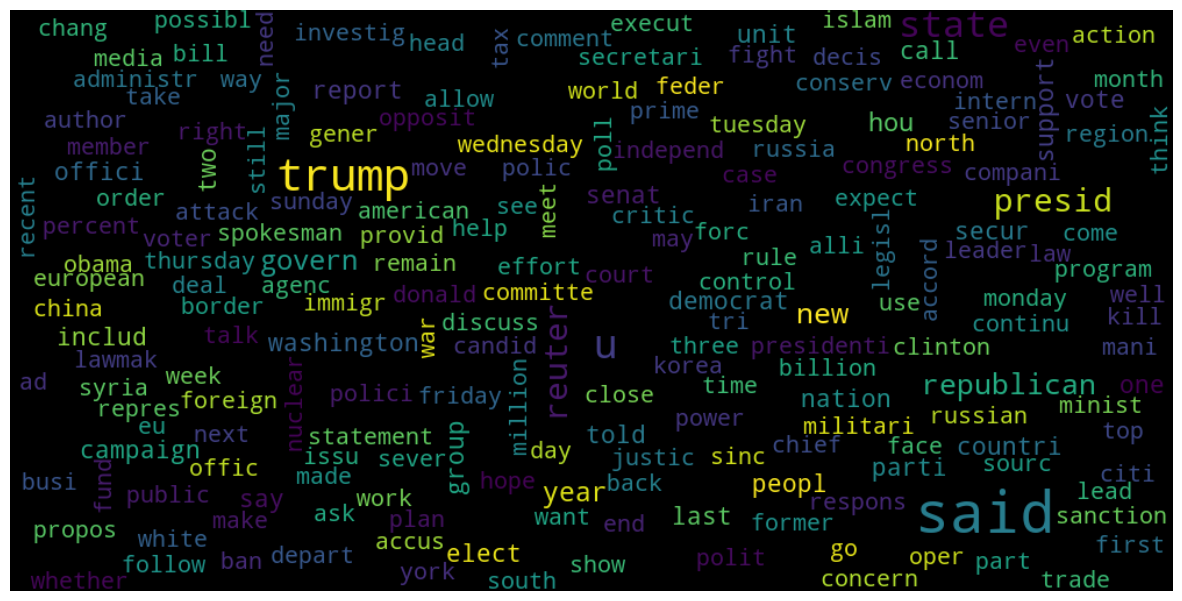

In [25]:
# Real
consolidated = ' '.join(
    word for word in df['text'][df['class'] == 1].astype(str))
wordCloud = WordCloud(width=1000,
                      height=500,
                      random_state=21,
                      max_font_size=50,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


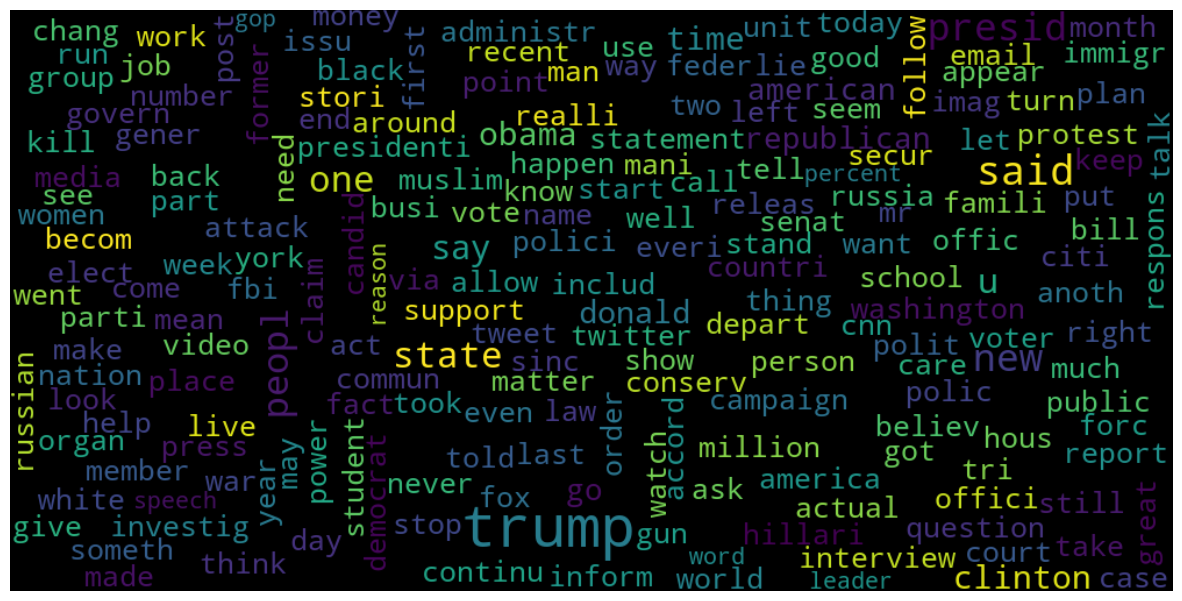

In [26]:
# fake
consolidated = ' '.join(
    word for word in df['text'][df['class'] == 0].astype(str))
wordCloud = WordCloud(width=1000,
                      height=500,
                      random_state=21,
                      max_font_size=50,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['class'], 
                                                    test_size=0.25)


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [37]:
import pickle
pickle.dump(vectorization,open('vectorized.pkl','wb'))
vectorized_model=pickle.load(open('vectorized.pkl','rb'))

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9916886817655615
0.9853072128227961


In [39]:
import pickle
pickle.dump(model,open('modelfr.pkl','wb'))
Model=pickle.load(open('modelfr.pkl','rb'))